In [3]:
# -*- coding: utf-8 -*-
# -*- author : Lokman Mheni - Fabio Palmisano -*-
# -*- date : 2024-04-20 -*-
# -*- Last revision: 2024-06-05 *-
# -*- python version : 3.11.9 -*-
# -*- Description: Logistic Regression with new graph-*-

In [4]:
import numpy as np
import pandas as pd
import networkx as nx
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from itertools import combinations
from collections import defaultdict
from tqdm import tqdm

#!pip install grakel
from grakel import GraphKernel
from grakel.utils import graph_from_networkx
from tqdm import tqdm

ratings = pd.read_csv('data/ratings.csv')
tr = pd.read_csv( 'data/to_read.csv' )

In [5]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import torch
import torch_geometric as pyg
from scipy import sparse
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader
from torch_geometric.datasets import GitHub
from torchmetrics import Metric
from torchmetrics.classification import Accuracy, BinaryF1Score, Precision, Recall

In [120]:
# From book_to_book.edgelist import and recreate the graph
edges = pd.read_csv('book_to_book.edgelist', sep=' ', names=['source', 'target','weight'])

# From book_to_book.edgelist import and recreate the graph
import networkx as nx

# Create a weighted graph from the edges DataFrame
book_to_book = nx.from_pandas_edgelist(edges, source='source', target='target', edge_attr='weight')

# Print the number of nodes and edges in the graph
print("Number of nodes:", len(book_to_book.nodes()))
print("Number of edges:", len(book_to_book.edges()))

Number of nodes: 9823
Number of edges: 6235818


In [121]:
edges

,source,target,weight
0,4,55,273
1,4,8,517
2,4,550,49
3,4,1714,23
4,4,118,148
...,...,...,...
6235813,6075,9548,1
6235814,6075,9535,1
6235815,9971,9548,1
6235816,9971,9535,1


In [122]:
edges.query('source == 3996')

,source,target,weight
6050163,3996,2889,1
6050164,3996,5789,1
6050165,3996,6678,2
6050166,3996,7793,1
6050167,3996,4776,2
...,...,...,...
6050282,3996,8063,1
6050283,3996,3778,1
6050284,3996,4896,1
6050285,3996,5279,1


In [123]:
print(len(book_to_book.nodes()))
print(len(book_to_book.edges()))

9823
6235818


In [124]:
# Imprte node features 
node_features = pd.read_csv('data/node_features_extended.csv', index_col=0)

In [125]:
node_features

,degree,degree_centrality,closeness,betweenness,clustering,eigenvector,pagerank,average_neighbor_degree,graph_labels,average_rating,ratings_count,text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
4,8916,0.907758,0.915548,0.004831,0.148205,0.036999,0.002910,1357.947734,1,4.25,3198671,72586,60427,117415,446835,1001952,1714267
55,7274,0.740582,0.794018,0.002438,0.183617,0.033192,0.001425,1507.655348,1,3.97,1022601,20095,26367,60328,219895,389379,383166
8,8307,0.845754,0.866367,0.003663,0.161138,0.035819,0.002213,1414.736126,1,3.79,2044241,44920,109383,185520,455042,661516,709176
550,3664,0.373040,0.614643,0.000331,0.324653,0.021262,0.000322,1988.850437,1,4.17,133271,11843,1566,4451,22055,58252,61340
1714,2318,0.236001,0.566894,0.000098,0.425887,0.015265,0.000151,2334.994392,1,3.98,58836,1750,364,1910,14429,27340,18137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6075,104,0.010588,0.426506,0.000000,1.000000,0.000199,0.000022,775.836538,0,4.02,20109,2068,558,1222,4601,8016,9217
9971,104,0.010588,0.426506,0.000000,1.000000,0.000199,0.000022,775.836538,0,3.87,10989,881,395,1182,4378,6060,5591
9548,104,0.010588,0.426506,0.000000,1.000000,0.000199,0.000022,775.836538,0,4.25,15460,2179,241,504,1952,5193,7592
9535,104,0.010588,0.426506,0.000000,1.000000,0.000199,0.000022,775.836538,0,4.33,20070,1407,146,512,2643,7784,11748


In [126]:
# Check the list of the nodes in the graph and the node features
print("Nodes in the graph:", book_to_book.nodes())
print("Nodes in the node features DataFrame:", node_features.index)

# Make matching the nodes in the graph and the node features DataFrame
print("Nodes in the graph but not in the node features DataFrame:", set(book_to_book.nodes()) - set(node_features.index))
print("Nodes in the node features DataFrame but not in the graph:", set(node_features.index) - set(book_to_book.nodes()))

# Remove the nodes in the graph but not in the node features DataFrame
book_to_book.remove_nodes_from(list(set(book_to_book.nodes()) - set(node_features.index)))


Nodes in the graph: [4, 55, 8, 550, 1714, 118, 848, 867, 10, 2136, 230, 171, 471, 64, 1159, 2679, 1060, 8457, 408, 261, 1313, 70, 26, 89, 7, 92, 211, 127, 76, 344, 534, 101, 4363, 2128, 67, 544, 681, 1644, 1386, 3293, 3579, 4322, 407, 3456, 33, 37, 136, 66, 123, 84, 626, 620, 29, 75, 148, 2671, 42, 453, 1457, 228, 212, 496, 222, 919, 2015, 343, 15, 133, 225, 58, 179, 32, 119, 150, 468, 22, 180, 102, 59, 461, 198, 271, 740, 795, 38, 108, 955, 1063, 1436, 952, 308, 411, 509, 8384, 126, 100, 398, 372, 8627, 8218, 98, 140, 6, 137, 99, 1, 1076, 1396, 5328, 24, 495, 45, 516, 5, 2, 13, 21, 14, 27, 65, 80, 483, 23, 18, 1096, 9, 4009, 354, 1269, 5397, 2408, 196, 621, 25, 50, 36, 660, 1117, 2193, 2302, 570, 1421, 484, 1389, 951, 1124, 854, 899, 3628, 219, 117, 888, 173, 160, 2052, 1265, 490, 1383, 2597, 116, 7468, 278, 373, 561, 28, 5089, 782, 306, 1402, 7232, 129, 413, 43, 715, 229, 1571, 350, 121, 158, 272, 1205, 54, 337, 1570, 3033, 730, 409, 386, 596, 833, 1245, 168, 3364, 297, 209, 157, 523

In [127]:
# Number of nodes 
print(len(book_to_book.nodes()))

9811


In [128]:
# Add to each node (index of the DataFrame) the corresponding features
for node in book_to_book.nodes():
    book_to_book.nodes[node]['features'] = node_features.loc[node].values


In [129]:
# For example print one node with its features
print("Node 4")
print("Features:", book_to_book.nodes[4]['features'])

Node 4
Features: [8.91600000e+03 9.07758094e-01 9.15548098e-01 4.83076239e-03
 1.48204807e-01 3.69986469e-02 2.90994649e-03 1.35794773e+03
 1.00000000e+00 4.25000000e+00 3.19867100e+06 7.25860000e+04
 6.04270000e+04 1.17415000e+05 4.46835000e+05 1.00195200e+06
 1.71426700e+06]


In [130]:
#Create a new data frame with index going from 0 to the number of nodes in the graph, then second column node.index and third the graph_labels (extract from nde_features)
node_features_tes = pd.read_csv('data/node_features_extended.csv', index_col=0)
node_features_tes

,degree,degree_centrality,closeness,betweenness,clustering,eigenvector,pagerank,average_neighbor_degree,graph_labels,average_rating,ratings_count,text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
4,8916,0.907758,0.915548,0.004831,0.148205,0.036999,0.002910,1357.947734,1,4.25,3198671,72586,60427,117415,446835,1001952,1714267
55,7274,0.740582,0.794018,0.002438,0.183617,0.033192,0.001425,1507.655348,1,3.97,1022601,20095,26367,60328,219895,389379,383166
8,8307,0.845754,0.866367,0.003663,0.161138,0.035819,0.002213,1414.736126,1,3.79,2044241,44920,109383,185520,455042,661516,709176
550,3664,0.373040,0.614643,0.000331,0.324653,0.021262,0.000322,1988.850437,1,4.17,133271,11843,1566,4451,22055,58252,61340
1714,2318,0.236001,0.566894,0.000098,0.425887,0.015265,0.000151,2334.994392,1,3.98,58836,1750,364,1910,14429,27340,18137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6075,104,0.010588,0.426506,0.000000,1.000000,0.000199,0.000022,775.836538,0,4.02,20109,2068,558,1222,4601,8016,9217
9971,104,0.010588,0.426506,0.000000,1.000000,0.000199,0.000022,775.836538,0,3.87,10989,881,395,1182,4378,6060,5591
9548,104,0.010588,0.426506,0.000000,1.000000,0.000199,0.000022,775.836538,0,4.25,15460,2179,241,504,1952,5193,7592
9535,104,0.010588,0.426506,0.000000,1.000000,0.000199,0.000022,775.836538,0,4.33,20070,1407,146,512,2643,7784,11748


In [131]:
book_to_book.nodes[4]

{'features': array([8.91600000e+03, 9.07758094e-01, 9.15548098e-01, 4.83076239e-03,
        1.48204807e-01, 3.69986469e-02, 2.90994649e-03, 1.35794773e+03,
        1.00000000e+00, 4.25000000e+00, 3.19867100e+06, 7.25860000e+04,
        6.04270000e+04, 1.17415000e+05, 4.46835000e+05, 1.00195200e+06,
        1.71426700e+06])}

In [132]:
# Now can we create a datastructure that can be used by PyTorch Geometric
# Create a list of edges
edges = list(book_to_book.edges(data=True))

# Create a list of nodes and their features
nodes = [(node, features['features']) for node, features in book_to_book.nodes(data=True)]

# Create a list of node indices
node_indices = [node for node, _ in nodes]


# Create a list of edge indices
edge_indices = [(source, target) for source, target, _ in edges]


In [133]:
node_indices[:5]

[4, 55, 8, 550, 1714]

In [134]:
edge_indices[:5]

[(4, 55), (4, 8), (4, 550), (4, 1714), (4, 118)]

In [135]:
#Can we make it as data x torch.tensor in order to use it in PyTorch Geometric
# Create a tensor of node indices
node_indices = torch.tensor(node_indices, dtype=torch.long)

# Create a tensor of edge indices
edge_indices = torch.tensor(edge_indices, dtype=torch.long)

# Create a tensor of edge weights
edge_weights = torch.tensor([edge['weight'] for _, _, edge in edges], dtype=torch.float)

# Create a tensor of node features without 'graph_label'
node_features_without_label = node_features.drop('graph_labels', axis=1)
node_features_tensor = torch.tensor(node_features_without_label.values, dtype=torch.float)

# Create a tensor of labels
labels = torch.tensor(node_features['graph_labels'].values, dtype=torch.long)

# Create a PyTorch Geometric data object
data = pyg.data.Data(
    x=node_features_tensor,
    edge_index=edge_indices.t().contiguous(),
    edge_attr=edge_weights,
    y=labels
)

# Print the data object
print(data)


Data(x=[9811, 16], edge_index=[2, 6229126], edge_attr=[6229126], y=[9811])


In [136]:
print("Design matrix")
n_nodes, n_feats = data.x.shape
print(f"Num. nodes: {n_nodes}; num features: {n_feats}")

Design matrix
Num. nodes: 9811; num features: 16


In [137]:
print("Target vector")
print("First five elements:", data.y[:5])
print("Number of samples:", data.y.shape)
print("Number of nodes in class 1:", data.y.sum().item())

Target vector
First five elements: tensor([1, 1, 1, 1, 1])
Number of samples: torch.Size([9811])
Number of nodes in class 1: 4334


In [138]:
print("Edge index shape:", data.edge_index.shape)
data.edge_index

Edge index shape: torch.Size([2, 6229126])


tensor([[   4,    4,    4,  ..., 9971, 9971, 9548],
        [  55,    8,  550,  ..., 9548, 9535, 9535]])

In [139]:
#We need to remove the edges that take indices to nodes that are not in the graph
# Create a mask for the edges that have both source and target nodes in the graph
mask = (data.edge_index[0] < n_nodes) & (data.edge_index[1] < n_nodes)

# Apply the mask to the edge index and edge weights
data.edge_index = data.edge_index[:, mask]
data.edge_attr = data.edge_attr[mask]


In [141]:
print("Edge index shape:", data.edge_index.shape)
data.edge_index

Edge index shape: torch.Size([2, 6145332])


tensor([[   4,    4,    4,  ..., 6075, 6075, 9548],
        [  55,    8,  550,  ..., 9548, 9535, 9535]])

In [142]:
rng = torch.Generator().manual_seed(452)
train_mask = torch.randn(n_nodes, generator=rng) < 0.8

n_nodes_tr = train_mask.sum().item()
print(f"Training set size: {n_nodes_tr} ({n_nodes_tr / n_nodes:.2%})")
print(f"Test set size: {n_nodes - n_nodes_tr} ({1 - n_nodes_tr / n_nodes:.2%})")
print(
    f"Ratio of class 1 in training: {torch.sum(train_mask * data.y).item() / n_nodes_tr:.2%}"
)

Training set size: 7725 (78.74%)
Test set size: 2086 (21.26%)
Ratio of class 1 in training: 44.17%


In [143]:

rf_classifier = RandomForestClassifier()
rf_classifier.fit(data.x[train_mask], data.y[train_mask])

RandomForestClassifier()

In [44]:
y_pred = rf_classifier.predict(data.x[~train_mask])
y_true = data.y[~train_mask]

print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1164
           1       0.85      0.75      0.80       922

    accuracy                           0.83      2086
   macro avg       0.84      0.82      0.83      2086
weighted avg       0.83      0.83      0.83      2086



In [144]:
# Neural Network Baseline
batch_size = 128

# Your solution here ###########################################################

train_dataloader = DataLoader(
    TensorDataset(data.x[train_mask], data.y[train_mask]),
    batch_size=batch_size,
    shuffle=True,
)

test_dataloader = DataLoader(
    TensorDataset(data.x[~train_mask], data.y[~train_mask]),
    batch_size=batch_size,
    shuffle=False,
)

for x, y in train_dataloader:
    print(x.shape, y.shape)
    break

torch.Size([128, 16]) torch.Size([128])


In [145]:
class MLP(nn.Module):
    # Your solution here #######################################################
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(16, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 2)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()  #or soft max
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        output = self.sigmoid(self.fc3(x))
        return output

In [146]:
def train_nn_step(
    optimizer: optim.Optimizer,
    loss_fn: nn.Module,
    model: nn.Module,
    x: torch.Tensor,
    y: torch.Tensor,
) -> float:
    model.train()  # Used to ensure that relevant blocks are in training mode

    # Your solution here #######################################################
    X, y = x.to(device), y.to(device)

    pred = model(X)
    loss = loss_fn(pred, y)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    return loss.item()/len(y)

In [147]:
def eval_nn(model: nn.Module, loader: DataLoader, metric_fn, metricPyTorch = False) -> float:
    model.eval()

    cumulative_metric = 0.0
    num_batches = 0

    with torch.no_grad():
        for batch in loader:
            inputs, targets = batch
            inputs, targets = inputs.to(next(model.parameters()).device), targets.to(next(model.parameters()).device)
            outputs = model(inputs)

            # If the metric is a TorchMetrics function, we need to call compute() to get the value
            if metricPyTorch:
                metric_fn.reset()
                binary_predictions = (outputs[:, 1] > 0.5).type(torch.int)
                metric_fn.update(binary_predictions, targets)
                cumulative_metric += metric_fn.compute()
            else:
                loss = metric_fn(outputs, targets)
                cumulative_metric += loss.item()

            num_batches += 1

    if num_batches > 0:
        cumulative_metric /= num_batches

    return cumulative_metric

In [148]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [149]:
# Your solution here ###########################################################

mlp = MLP().to(device)

print(mlp)

loss_fn = nn.CrossEntropyLoss()

learning_rate = 0.01  # Adjust as needed

optimizer = optim.Adam(mlp.parameters(), lr=learning_rate)

metric = eval_nn(mlp, test_dataloader, loss_fn)

print(metric)

# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

MLP(
  (fc1): Linear(in_features=16, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=2, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)
0.6931472455754


Epoch 0, Train Loss: 7.06500215348623e-05
Epoch 1, Train Loss: 7.06500215348623e-05
Epoch 2, Train Loss: 7.06500215348623e-05
Epoch 3, Train Loss: 7.06500215348623e-05
Epoch 4, Train Loss: 7.06500215348623e-05
Epoch 5, Train Loss: 7.06500215348623e-05
Epoch 6, Train Loss: 7.06500215348623e-05
Epoch 7, Train Loss: 7.06500215348623e-05
Epoch 8, Train Loss: 7.06500215348623e-05
Epoch 9, Train Loss: 7.06500215348623e-05
Epoch 10, Train Loss: 7.06500215348623e-05
Epoch 11, Train Loss: 7.06500215348623e-05
Epoch 12, Train Loss: 7.06500215348623e-05
Epoch 13, Train Loss: 7.06500215348623e-05
Epoch 14, Train Loss: 7.06500215348623e-05
Epoch 15, Train Loss: 7.06500215348623e-05
Epoch 16, Train Loss: 7.06500215348623e-05
Epoch 17, Train Loss: 7.06500215348623e-05
Epoch 18, Train Loss: 7.06500215348623e-05
Epoch 19, Train Loss: 7.06500215348623e-05
Epoch 20, Train Loss: 7.06500215348623e-05
Epoch 21, Train Loss: 7.06500215348623e-05
Epoch 22, Train Loss: 7.06500215348623e-05
Epoch 23, Train Loss:

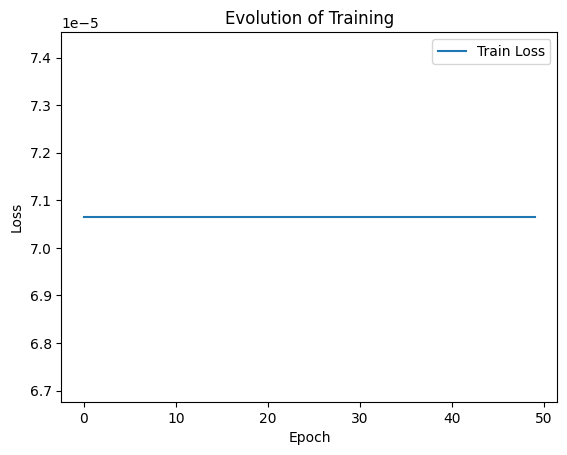

In [150]:
n_epochs = 50

# Your solution here ###########################################################
train_ = []
for t in range(n_epochs):
    train = train_nn_step(optimizer, loss_fn, mlp, data.x, data.y)
    print(f"Epoch {t}, Train Loss: {train}")
    train_.append(train)

#Plot the evolution of training loss
plt.plot(train_, label = "Train Loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Evolution of Training")
plt.show()

In [151]:
# Your solution here ###########################################################
accuracy_fn = Accuracy(task="binary", num_classes=2).to(device)
metric_tr = eval_nn(mlp, train_dataloader, accuracy_fn, metricPyTorch=True)
metric_te = eval_nn(mlp, test_dataloader, accuracy_fn, metricPyTorch=True)
print(f"Training metric Accuracy: {metric_tr:.3f}")
print(f"Test metric Accuracy:     {metric_te:.3f}")
print('--------------------------------------')

metric_tr_F1 = eval_nn(mlp, train_dataloader, BinaryF1Score(), metricPyTorch=True)
metric_te_F1 = eval_nn(mlp, test_dataloader, BinaryF1Score(), metricPyTorch=True)

#We decide to take the F1 score, as discussed before for unbalanced dataset it's the best metric (more indicative metric)
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

print(f"Training metric: {metric_tr_F1:.3f}")
print(f"Test metric:     {metric_te_F1:.3f}")

Training metric Accuracy: 0.439
Test metric Accuracy:     0.427
--------------------------------------
Training metric: 0.611
Test metric:     0.574


Epoch 0, Train Loss: 9.695923444136833e-05, Test Loss: 0.6931472455754
Epoch 1, Train Loss: 8.972781375773903e-05, Test Loss: 0.6931472455754
Epoch 2, Train Loss: 8.972781375773903e-05, Test Loss: 0.6931472455754
Epoch 3, Train Loss: 8.972781375773903e-05, Test Loss: 0.6931472455754
Epoch 4, Train Loss: 8.972781375773903e-05, Test Loss: 0.6931472455754
Epoch 5, Train Loss: 8.972781375773903e-05, Test Loss: 0.6931472455754
Epoch 6, Train Loss: 8.972781375773903e-05, Test Loss: 0.6931472455754
Epoch 7, Train Loss: 8.972781375773903e-05, Test Loss: 0.6931472455754
Epoch 8, Train Loss: 8.972781375773903e-05, Test Loss: 0.6931472455754
Epoch 9, Train Loss: 8.972781375773903e-05, Test Loss: 0.6931472455754


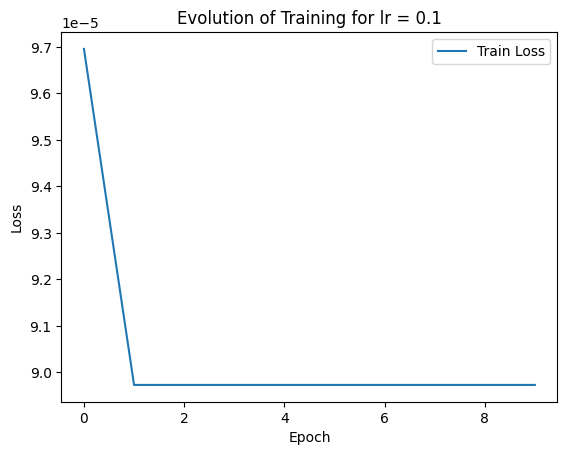

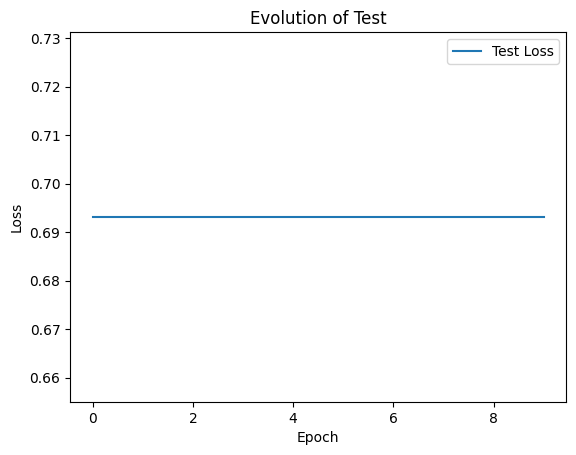

Training metric: 0.000
Test metric:     0.000
Epoch 0, Train Loss: 0.00011253428690641829, Test Loss: 0.747201681137085
Epoch 1, Train Loss: 9.786608149704424e-05, Test Loss: 0.6931472455754
Epoch 2, Train Loss: 8.972781375773903e-05, Test Loss: 0.6931472455754
Epoch 3, Train Loss: 8.972781375773903e-05, Test Loss: 0.6931472455754
Epoch 4, Train Loss: 8.972781375773903e-05, Test Loss: 0.6931472455754
Epoch 5, Train Loss: 8.972781375773903e-05, Test Loss: 0.6931472455754
Epoch 6, Train Loss: 8.972781375773903e-05, Test Loss: 0.6931472455754
Epoch 7, Train Loss: 8.972781375773903e-05, Test Loss: 0.6931472455754
Epoch 8, Train Loss: 8.972781375773903e-05, Test Loss: 0.6931472455754
Epoch 9, Train Loss: 8.972781375773903e-05, Test Loss: 0.6931472455754


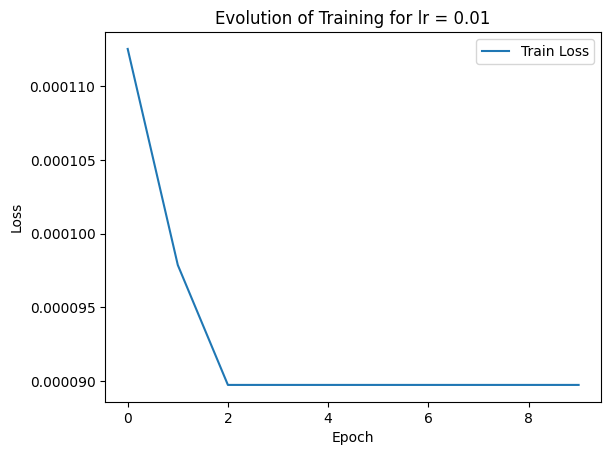

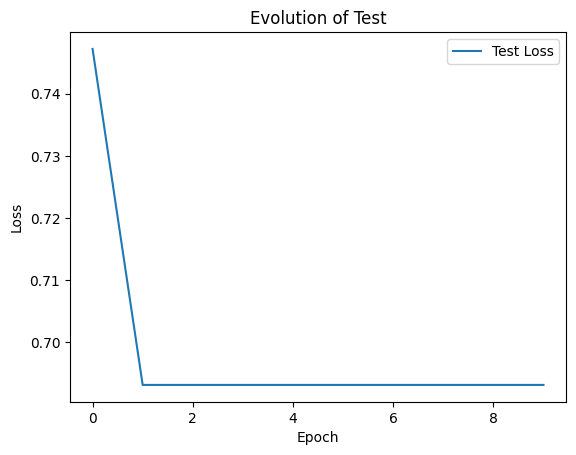

Training metric: 0.000
Test metric:     0.000
Epoch 0, Train Loss: 8.972781375773903e-05, Test Loss: 0.6934322259005379
Epoch 1, Train Loss: 8.972781375773903e-05, Test Loss: 0.6934322259005379
Epoch 2, Train Loss: 8.972781375773903e-05, Test Loss: 0.6934322259005379
Epoch 3, Train Loss: 8.972781375773903e-05, Test Loss: 0.6934322259005379
Epoch 4, Train Loss: 8.972781375773903e-05, Test Loss: 0.6934322259005379
Epoch 5, Train Loss: 8.972781375773903e-05, Test Loss: 0.6934322259005379
Epoch 6, Train Loss: 8.972781375773903e-05, Test Loss: 0.6934322259005379
Epoch 7, Train Loss: 8.972781375773903e-05, Test Loss: 0.6934322259005379
Epoch 8, Train Loss: 8.972781375773903e-05, Test Loss: 0.6934322259005379
Epoch 9, Train Loss: 8.972781375773903e-05, Test Loss: 0.6934322259005379


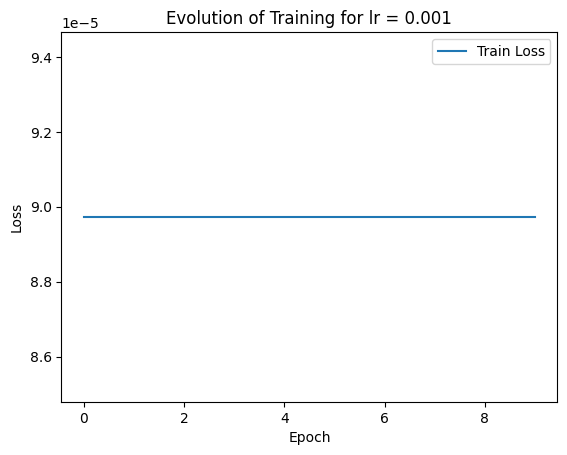

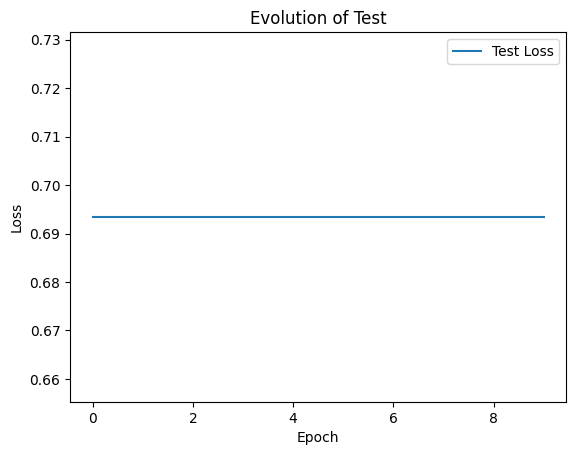

Training metric: 0.000
Test metric:     0.000


In [152]:
learning_rate = [0.1, 0.01, 0.001]


loss_fn = nn.CrossEntropyLoss()
n_epochs = 10

for lr in learning_rate :
    mlp = MLP().to(device)
    optimizer = optim.Adam(mlp.parameters(), lr=lr)
    train_ = []
    test_ = []
    for t in range(n_epochs):
        train = train_nn_step(optimizer, loss_fn, mlp, data.x[train_mask], data.y[train_mask])
        test = eval_nn(mlp, test_dataloader, loss_fn)
        print(f"Epoch {t}, Train Loss: {train}, Test Loss: {test}")
        train_.append(train)
        test_.append(test)

    #Plot the evolution of training loss
    plt.plot(train_, label = "Train Loss")
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Evolution of Training for lr = {}".format(lr))
    plt.show()
    plt.plot(test_, label = "Test Loss")
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Evolution of Test")
    plt.show()
    metric_tr_F1 = eval_nn(mlp, train_dataloader, BinaryF1Score(), metricPyTorch=True)
    metric_te_F1 = eval_nn(mlp, test_dataloader, BinaryF1Score(), metricPyTorch=True)
    print(f"Training metric: {metric_tr_F1:.3f}")
    print(f"Test metric:     {metric_te_F1:.3f}")

In [68]:
# Assuming 'edges' is a list of edge pairs with an additional attribute
df_edges = pd.DataFrame(edges, columns=['source', 'target', 'attribute'])

# Now you can create the mapping and reindex the nodes
nodes = pd.concat([df_edges['source'], df_edges['target']]).unique()
node_mapping = pd.Series(index=nodes, data=range(len(nodes)))

# Apply the mapping to the source and target columns
df_edges['source'] = df_edges['source'].map(node_mapping)
df_edges['target'] = df_edges['target'].map(node_mapping)

# Now you can create your edge_index tensor
edge_index = torch.tensor(df_edges[['source', 'target']].values.T, dtype=torch.long)

data.edge_index = edge_index

In [109]:
data.x

tensor([[ 6.5455,  6.5455,  8.8507,  ..., 15.1149, 18.9180, 20.9979],
        [ 5.1397,  5.1397,  6.0085,  ...,  7.2329,  7.1132,  4.4607],
        [ 6.0241,  6.0241,  7.7005,  ..., 15.3999, 12.3575,  8.5109],
        ...,
        [-0.9987, -0.9987, -2.5864,  ..., -0.3366, -0.2904, -0.2054],
        [-0.9987, -0.9987, -2.5864,  ..., -0.3126, -0.2405, -0.1537],
        [-0.9987, -0.9987, -0.8132,  ..., -0.3071, -0.2527, -0.1849]])

In [153]:

class GCN(nn.Module):
    def __init__(self, hidden_dim):
        super().__init__()
        self.conv1 = pyg.nn.GCNConv(16, hidden_dim)
        self.conv2 = pyg.nn.GCNConv(hidden_dim, hidden_dim)
        self.conv3 = pyg.nn.GCNConv(hidden_dim, 2)
        self.bn1 = nn.BatchNorm1d(hidden_dim)
        self.bn2 = nn.BatchNorm1d(hidden_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        # First Conv layer
        x1 = self.conv1(x, edge_index)
        x1 = self.bn1(x1)
        x1 = F.leaky_relu(x1)
        x1 = F.dropout(x1, training=self.training)

        # Second Conv layer with residual connection
        x2 = self.conv2(x1, edge_index)
        x2 = self.bn2(x2)
        x2 = F.leaky_relu(x2)
        x2 = F.dropout(x2, training=self.training)
        x2 = x2 + x1  # Residual connection

        # Third Conv layer
        x3 = self.conv3(x2, edge_index)

        return F.log_softmax(x3, dim=1)

Epoch 0, Loss: 0.8616034984588623
Epoch 1, Loss: 6.310535907745361
Epoch 2, Loss: 3.2196755409240723
Epoch 3, Loss: 1.2394698858261108
Epoch 4, Loss: 1.2863630056381226
Epoch 5, Loss: 1.171729326248169
Epoch 6, Loss: 0.8147488832473755
Epoch 7, Loss: 1.044049859046936
Epoch 8, Loss: 1.1339656114578247
Epoch 9, Loss: 0.8698800802230835
Epoch 10, Loss: 0.7816192507743835
Epoch 11, Loss: 1.1668857336044312
Epoch 12, Loss: 0.7736333012580872
Epoch 13, Loss: 0.826714038848877
Epoch 14, Loss: 0.7302972078323364
Epoch 15, Loss: 0.7939424514770508
Epoch 16, Loss: 0.748791515827179
Epoch 17, Loss: 0.8362269401550293
Epoch 18, Loss: 0.7353854775428772
Epoch 19, Loss: 0.8239367008209229


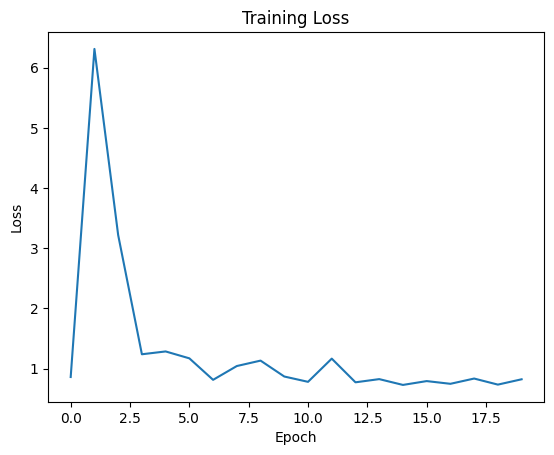

Accuracy score for train set: 0.44906148314476013
Accuracy score for test set: 0.4530201256275177
Training metric (F1 Score): 0.611
Test metric (F1 Score) :     0.614


In [154]:
n_epochs = 20
gcn = GCN(128).to(device)

optimizer = optim.Adam(gcn.parameters(), lr=0.01)
loss_fn = nn.CrossEntropyLoss()
train_loss = []
gcn.train()

# Add early stopping
min_loss = float('inf')
patience = 10
counter = 0
for epoch in range(n_epochs):
    optimizer.zero_grad()
    out = gcn(data)
    loss = loss_fn(out[train_mask], data.y[train_mask])
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch}, Loss: {loss}")
    train_loss.append(loss.item())
    
    # Early stopping
    if loss < min_loss:
        min_loss = loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping")
            break

plt.plot(train_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()


gcn.eval()
out = gcn(data)
pred = out.argmax(dim=1)

#Accuracy
accuracy_fn = Accuracy(task="binary", num_classes=2)
print(f"Accuracy score for train set: {accuracy_fn(pred[train_mask], data.y[train_mask])}")
print(f"Accuracy score for test set: {accuracy_fn(pred[~train_mask], data.y[~train_mask])}")

#Print the pred value and the predict side by side (dataframe)
pd.DataFrame({'pred': pred, 'true': data.y})

#Print the F1 score
f1 = BinaryF1Score()
metric_tr = f1(pred[train_mask], data.y[train_mask])
metric_te = f1(pred[~train_mask], data.y[~train_mask])

# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
plt.show()

print(f"Training metric (F1 Score): {metric_tr:.3f}")
print(f"Test metric (F1 Score) :     {metric_te:.3f}")

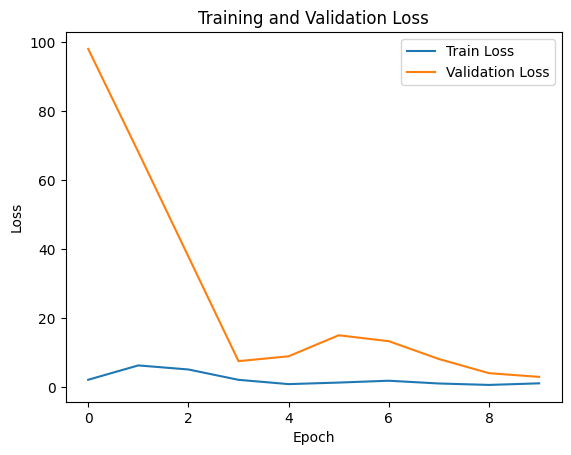

Accuracy score for train set: 0.558
Accuracy score for test set: 0.558
Training metric (F1 Score): 0.000
Test metric (F1 Score) :     0.002


In [155]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch_geometric.nn import GCNConv
from sklearn.metrics import accuracy_score, f1_score

class GCN(nn.Module):
    def __init__(self, hidden_dim):
        super().__init__()
        self.conv1 = GCNConv(16, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.conv3 = GCNConv(hidden_dim, 2)
        self.bn1 = nn.BatchNorm1d(hidden_dim)
        self.bn2 = nn.BatchNorm1d(hidden_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        # First Conv layer
        x1 = self.conv1(x, edge_index)
        x1 = self.bn1(x1)
        x1 = F.leaky_relu(x1)
        x1 = F.dropout(x1, p=0.5, training=self.training)

        # Second Conv layer with residual connection
        x2 = self.conv2(x1, edge_index)
        x2 = self.bn2(x2)
        x2 = F.leaky_relu(x2)
        x2 = F.dropout(x2, p=0.5, training=self.training)
        x2 = x2 + x1  # Residual connection

        # Third Conv layer
        x3 = self.conv3(x2, edge_index)

        return F.log_softmax(x3, dim=1)

# Assume data, train_mask, and test_mask are already defined
n_epochs = 10  # Increase the number of epochs
hidden_dim = 128
gcn = GCN(hidden_dim).to(device)

optimizer = optim.Adam(gcn.parameters(), lr=0.01)
loss_fn = nn.CrossEntropyLoss()
train_loss = []
val_loss = []

# Add early stopping
min_val_loss = float('inf')
patience = 10
counter = 0
gcn.train()

for epoch in range(n_epochs):
    optimizer.zero_grad()
    out = gcn(data)
    loss = loss_fn(out[train_mask], data.y[train_mask])
    loss.backward()
    optimizer.step()
    train_loss.append(loss.item())

    # Validation
    gcn.eval()
    with torch.no_grad():
        out = gcn(data)
        val_loss_value = loss_fn(out[~train_mask], data.y[~train_mask]).item()
        val_loss.append(val_loss_value)

    # Early stopping
    if val_loss_value < min_val_loss:
        min_val_loss = val_loss_value
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping")
            break

    gcn.train()

plt.plot(train_loss, label="Train Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

gcn.eval()
with torch.no_grad():
    out = gcn(data)
    pred = out.argmax(dim=1)

# Accuracy
train_acc = accuracy_score(data.y[train_mask].cpu(), pred[train_mask].cpu())
test_acc = accuracy_score(data.y[~train_mask].cpu(), pred[~train_mask].cpu())

print(f"Accuracy score for train set: {train_acc:.3f}")
print(f"Accuracy score for test set: {test_acc:.3f}")

# F1 Score
train_f1 = f1_score(data.y[train_mask].cpu(), pred[train_mask].cpu(), average="binary")
test_f1 = f1_score(data.y[~train_mask].cpu(), pred[~train_mask].cpu(), average="binary")

print(f"Training metric (F1 Score): {train_f1:.3f}")
print(f"Test metric (F1 Score) :     {test_f1:.3f}")


# Print Node Index, Prediction and True Label side by side in order to verify if the problem of accuracy doesn't come from here
results = pd.DataFrame({'Node Index': range(len(data.y)), 'Prediction': pred.cpu(), 'True Label': data.y.cpu()})


In [156]:
results 

,Node Index,Prediction,True Label
0,0,1,1
1,1,0,1
2,2,0,1
3,3,0,1
4,4,0,1
...,...,...,...
9806,9806,0,0
9807,9807,0,0
9808,9808,0,0
9809,9809,0,0


In [157]:
results.to_csv('results.csv', index=False)

In [158]:
# Check of many 1 and 0 are predicted 
results['Prediction'].value_counts()


Prediction
0    9810
1       1
Name: count, dtype: int64

In [100]:
class GCN(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2):
        super().__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim1)
        self.conv2 = GCNConv(hidden_dim1, hidden_dim2)
        self.conv3 = GCNConv(hidden_dim2, 2)
        self.bn1 = nn.BatchNorm1d(hidden_dim1)
        self.bn2 = nn.BatchNorm1d(hidden_dim2)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x1 = self.conv1(x, edge_index)
        x1 = self.bn1(x1)
        x1 = F.leaky_relu(x1)
        x1 = F.dropout(x1, p=0.5, training=self.training)

        x2 = self.conv2(x1, edge_index)
        x2 = self.bn2(x2)
        x2 = F.leaky_relu(x2)
        x2 = F.dropout(x2, p=0.5, training=self.training)
        x2 = x2 + x1  # Residual connection

        x3 = self.conv3(x2, edge_index)
        return F.log_softmax(x3, dim=1)

# Initialize model, loss function, and optimizer
hidden_dim1 = 64
hidden_dim2 = 32
input_dim = data.x.shape[1]
gcn = GCN(input_dim, hidden_dim1, hidden_dim2).to(device)
optimizer = optim.Adam(gcn.parameters(), lr=0.01)
loss_fn = nn.CrossEntropyLoss()

# Training loop with early stopping
n_epochs = 100
train_loss = []
val_loss = []

min_val_loss = float('inf')
patience = 10
counter = 0
gcn.train()

for epoch in range(n_epochs):
    gcn.train()
    optimizer.zero_grad()
    out = gcn(data)
    loss = loss_fn(out[train_mask], data.y[train_mask])
    loss.backward()
    optimizer.step()
    train_loss.append(loss.item())

    gcn.eval()
    with torch.no_grad():
        out = gcn(data)
        val_loss_value = loss_fn(out[~train_mask], data.y[~train_mask]).item()
        val_loss.append(val_loss_value)

    if val_loss_value < min_val_loss:
        min_val_loss = val_loss_value
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping")
            break

plt.plot(train_loss, label="Train Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()



RuntimeError: The size of tensor a (32) must match the size of tensor b (64) at non-singleton dimension 1

In [101]:
from sklearn.metrics import confusion_matrix, classification_report

gcn.eval()
with torch.no_grad():
    out = gcn(data)
    pred = out.argmax(dim=1)

# Confusion matrix
cm = confusion_matrix(data.y.cpu(), pred.cpu())
print("Confusion Matrix:\n", cm)

# Classification report
print(classification_report(data.y.cpu(), pred.cpu(), target_names=['Class 0', 'Class 1']))

# Accuracy
train_acc = accuracy_score(data.y[train_mask].cpu(), pred[train_mask].cpu())
test_acc = accuracy_score(data.y[~train_mask].cpu(), pred[~train_mask].cpu())

print(f"Accuracy score for train set: {train_acc:.3f}")
print(f"Accuracy score for test set: {test_acc:.3f}")

# F1 Score
train_f1 = f1_score(data.y[train_mask].cpu(), pred[train_mask].cpu(), average="binary")
test_f1 = f1_score(data.y[~train_mask].cpu(), pred[~train_mask].cpu(), average="binary")

print(f"Training metric (F1 Score): {train_f1:.3f}")
print(f"Test metric (F1 Score) :     {test_f1:.3f}")


RuntimeError: The size of tensor a (32) must match the size of tensor b (64) at non-singleton dimension 1

In [102]:
class GCN(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super().__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.conv3 = GCNConv(hidden_dim, 2)
        self.bn1 = nn.BatchNorm1d(hidden_dim)
        self.bn2 = nn.BatchNorm1d(hidden_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x1 = self.conv1(x, edge_index)
        x1 = self.bn1(x1)
        x1 = F.leaky_relu(x1)
        x1 = F.dropout(x1, p=0.5, training=self.training)

        x2 = self.conv2(x1, edge_index)
        x2 = self.bn2(x2)
        x2 = F.leaky_relu(x2)
        x2 = F.dropout(x2, p=0.5, training=self.training)
        x2 = x2 + x1  # Residual connection

        x3 = self.conv3(x2, edge_index)
        return F.log_softmax(x3, dim=1)


Early stopping


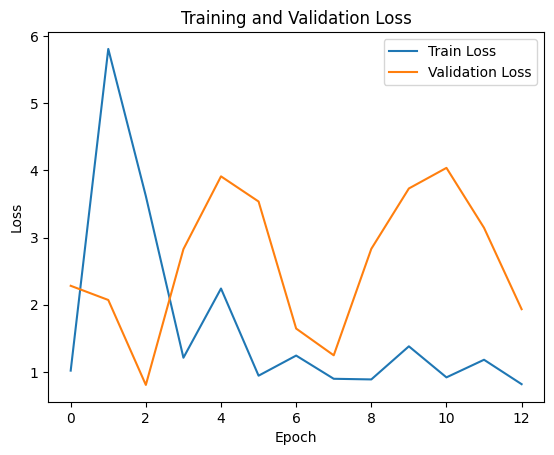

Confusion Matrix:
 [[  43 5434]
 [   7 4327]]
              precision    recall  f1-score   support

     Class 0       0.86      0.01      0.02      5477
     Class 1       0.44      1.00      0.61      4334

    accuracy                           0.45      9811
   macro avg       0.65      0.50      0.31      9811
weighted avg       0.68      0.45      0.28      9811

Accuracy score for train set: 0.446
Accuracy score for test set: 0.445
Training metric (F1 Score): 0.614
Test metric (F1 Score) :     0.614


In [103]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.nn import GCNConv
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Standardize features
scaler = StandardScaler()
data.x = torch.tensor(scaler.fit_transform(data.x.cpu()), dtype=torch.float).to(device)

# Model definition
class GCN(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super().__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.conv3 = GCNConv(hidden_dim, 2)
        self.bn1 = nn.BatchNorm1d(hidden_dim)
        self.bn2 = nn.BatchNorm1d(hidden_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x1 = self.conv1(x, edge_index)
        x1 = self.bn1(x1)
        x1 = F.leaky_relu(x1)
        x1 = F.dropout(x1, p=0.5, training=self.training)

        x2 = self.conv2(x1, edge_index)
        x2 = self.bn2(x2)
        x2 = F.leaky_relu(x2)
        x2 = F.dropout(x2, p=0.5, training=self.training)
        x2 = x2 + x1  # Residual connection

        x3 = self.conv3(x2, edge_index)
        return F.log_softmax(x3, dim=1)

# Initialize model, loss function, and optimizer
hidden_dim = 64
input_dim = data.x.shape[1]
gcn = GCN(input_dim, hidden_dim).to(device)
optimizer = optim.Adam(gcn.parameters(), lr=0.01)
loss_fn = nn.CrossEntropyLoss()

# Training loop with early stopping
n_epochs = 100
train_loss = []
val_loss = []

min_val_loss = float('inf')
patience = 10
counter = 0
gcn.train()

for epoch in range(n_epochs):
    gcn.train()
    optimizer.zero_grad()
    out = gcn(data)
    loss = loss_fn(out[train_mask], data.y[train_mask])
    loss.backward()
    optimizer.step()
    train_loss.append(loss.item())

    gcn.eval()
    with torch.no_grad():
        out = gcn(data)
        val_loss_value = loss_fn(out[~train_mask], data.y[~train_mask]).item()
        val_loss.append(val_loss_value)

    if val_loss_value < min_val_loss:
        min_val_loss = val_loss_value
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping")
            break

plt.plot(train_loss, label="Train Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

# Evaluate the model
gcn.eval()
with torch.no_grad():
    out = gcn(data)
    pred = out.argmax(dim=1)

# Confusion matrix
cm = confusion_matrix(data.y.cpu(), pred.cpu())
print("Confusion Matrix:\n", cm)

# Classification report
print(classification_report(data.y.cpu(), pred.cpu(), target_names=['Class 0', 'Class 1']))

# Accuracy
train_acc = accuracy_score(data.y[train_mask].cpu(), pred[train_mask].cpu())
test_acc = accuracy_score(data.y[~train_mask].cpu(), pred[~train_mask].cpu())

print(f"Accuracy score for train set: {train_acc:.3f}")
print(f"Accuracy score for test set: {test_acc:.3f}")

# F1 Score
train_f1 = f1_score(data.y[train_mask].cpu(), pred[train_mask].cpu(), average="binary")
test_f1 = f1_score(data.y[~train_mask].cpu(), pred[~train_mask].cpu(), average="binary")

print(f"Training metric (F1 Score): {train_f1:.3f}")
print(f"Test metric (F1 Score) :     {test_f1:.3f}")
